In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
df = pd.read_csv("breastCancer.csv")
print("Shape:", df.shape)
df.head()

Shape: (699, 11)


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [20]:
if 'id' in df.columns:
    df = df.drop(columns='id')


In [21]:
df = df.dropna()


In [22]:
if df['class'].dtype == '0':
    df['class'] = df['class'].map({2: 0, 4: 1})  # or check your dataset values
X = df.drop(columns='class')
y = df['class']



In [23]:
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
print(df.columns)


Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

[[ 0.20693572 -0.37204831 -0.74329904 ... -0.17966213 -0.61182504
  -0.34391178]
 [ 0.20693572 -0.04410156 -0.06984988 ... -0.17966213  0.37131451
  -0.34391178]
 [-1.2146669  -0.69999505 -0.74329904 ... -0.17966213 -0.61182504
  -0.34391178]
 ...
 [ 1.27313768  0.28384518  1.27704844 ... -0.17966213  2.00988041
   0.23956962]
 [ 1.983939    1.59563215  2.28722218 ...  0.64114721 -0.61182504
  -0.34391178]
 [-0.14846494 -0.69999505 -0.40657446 ... -0.17966213 -0.61182504
  -0.34391178]] [[-1.2146669  -0.69999505 -0.40657446 ... -1.00047147 -0.61182504
  -0.34391178]
 [-0.14846494 -0.69999505 -0.74329904 ... -0.5900668  -0.61182504
  -0.34391178]
 [-0.50386559 -0.69999505 -0.74329904 ... -0.17966213 -0.61182504
  -0.34391178]
 ...
 [ 0.20693572 -0.69999505 -0.74329904 ... -0.17966213 -0.28411186
  -0.34391178]
 [-0.85926625 -0.69999505 -0.74329904 ... -0.17966213 -0.61182504
  -0.34391178]
 [-1.2146669  -0.04410156 -0.74329904 ...  0.64114721  0.04360132
   0.23956962]] 82     2
51     

In [29]:
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean


In [33]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
print(X_train)
print(X_test)

[[ 0.20693572 -0.37204831 -0.74329904 ... -0.17966213 -0.61182504
  -0.34391178]
 [ 0.20693572 -0.04410156 -0.06984988 ... -0.17966213  0.37131451
  -0.34391178]
 [-1.2146669  -0.69999505 -0.74329904 ... -0.17966213 -0.61182504
  -0.34391178]
 ...
 [ 1.27313768  0.28384518  1.27704844 ... -0.17966213  2.00988041
   0.23956962]
 [ 1.983939    1.59563215  2.28722218 ...  0.64114721 -0.61182504
  -0.34391178]
 [-0.14846494 -0.69999505 -0.40657446 ... -0.17966213 -0.61182504
  -0.34391178]]
[[-1.2146669  -0.69999505 -0.40657446 ... -1.00047147 -0.61182504
  -0.34391178]
 [-0.14846494 -0.69999505 -0.74329904 ... -0.5900668  -0.61182504
  -0.34391178]
 [-0.50386559 -0.69999505 -0.74329904 ... -0.17966213 -0.61182504
  -0.34391178]
 ...
 [ 0.20693572 -0.69999505 -0.74329904 ... -0.17966213 -0.28411186
  -0.34391178]
 [-0.85926625 -0.69999505 -0.74329904 ... -0.17966213 -0.61182504
  -0.34391178]
 [-1.2146669  -0.04410156 -0.74329904 ...  0.64114721  0.04360132
   0.23956962]]


In [34]:
svc_linear = SVC(kernel='linear', random_state=42)
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)

acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy (Linear SVC): {acc_linear}")
print(f"y_pred_linear: {y_pred_linear}")

Accuracy (Linear SVC): 0.9714285714285714
y_pred_linear: [2 2 2 4 2 2 2 4 4 2 2 4 2 2 2 4 2 4 4 4 4 2 4 2 4 2 2 4 2 4 2 2 2 4 2 2 2
 4 2 4 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 4 4 2 2 4 2 4 2
 2 2 2 4 2 2 2 2 2 2 2 4 4 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 4 4 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 2 2 4 2 2 4 4 2 2 4 4 2 2 4 2 4 2 4 2 2 2]


In [35]:
svc_rbf = SVC(kernel='rbf', random_state=42)
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

In [38]:
print(f"acc_rbf: {acc_rbf}")

acc_rbf: 0.9714285714285714


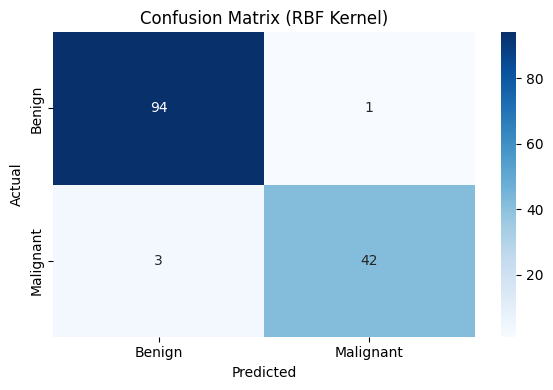

In [39]:
cm = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RBF Kernel)')
plt.tight_layout()
plt.show()


In [40]:
print(f"🔹 Accuracy (Linear Kernel): {acc_linear:.2f}")
print(f"🔹 Accuracy (RBF Kernel): {acc_rbf:.2f}")
if acc_rbf > acc_linear:
    print("✅ RBF kernel performed better, capturing non-linear patterns in the data.")
else:
    print("ℹ️ Linear kernel was sufficient; no significant non-linear patterns were found.")

🔹 Accuracy (Linear Kernel): 0.97
🔹 Accuracy (RBF Kernel): 0.97
ℹ️ Linear kernel was sufficient; no significant non-linear patterns were found.
